In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [3]:
df1.shape

(418, 11)

In [4]:
df2.shape

(891, 12)

In [5]:
df = pd.concat([df1,df2], sort=False)

In [6]:
df.shape

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.PassengerId.value_counts()

1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: PassengerId, Length: 1309, dtype: int64

In [9]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [10]:
df['ismale'] = np.where(df['Sex'] == "male", 1, 0)

In [11]:
df.drop(columns='Sex', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Survived     891 non-null    float64
 11  ismale       1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 127.8+ KB


In [13]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
C78                4
                  ..
C82                1
C103               1
C97                1
T                  1
C110               1
Name: Cabin, Length: 186, dtype: int64

In [14]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['Embarked'])
#df.drop(columns='Embarked', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), object(3), uint8(3)
memory usage: 121.4+ KB


In [16]:
df.sample(7)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,ismale,Embarked_C,Embarked_Q,Embarked_S
661,662,3,"Badt, Mr. Mohamed",40.0,0,0,2623,7.2250,NaN,0.0,1,1,0,0
610,611,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",39.0,1,5,347082,31.2750,NaN,0.0,0,0,0,1
753,754,3,"Jonkoff, Mr. Lalio",23.0,0,0,349204,7.8958,NaN,0.0,1,0,0,1
29,921,3,"Samaan, Mr. Elias",NaN,2,0,2662,21.6792,NaN,NaN,1,1,0,0
231,1123,1,"Willard, Miss. Constance",21.0,0,0,113795,26.5500,NaN,NaN,0,0,0,1
74,75,3,"Bing, Mr. Lee",32.0,0,0,1601,56.4958,NaN,1.0,1,0,0,1
528,529,3,"Salonen, Mr. Johan Werner",39.0,0,0,3101296,7.9250,NaN,0.0,1,0,0,1


In [17]:
#df = df.astype(float)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

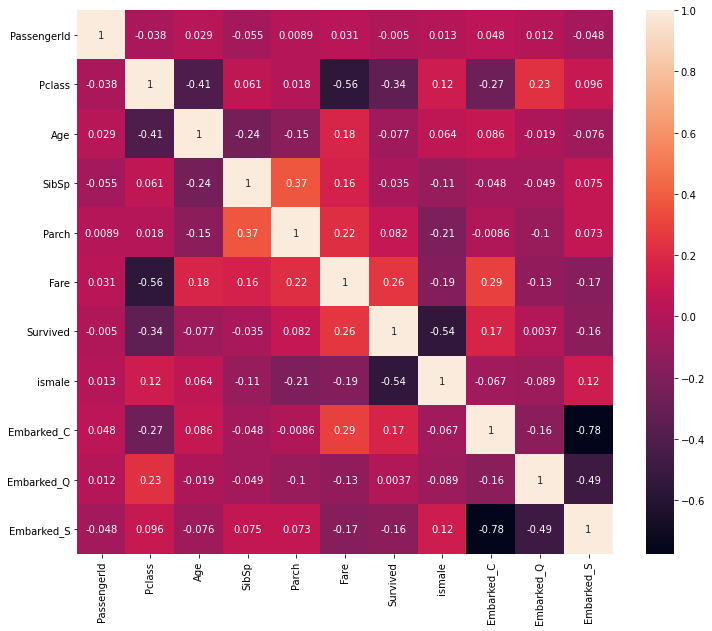

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

In [20]:
df.Age.value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
26.5     1
11.5     1
60.5     1
Name: Age, Length: 98, dtype: int64

In [21]:
df.Age.median()

28.0

In [22]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [23]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [24]:
df[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


In [25]:
df[['SibSp', 'Age']].groupby('SibSp').mean()

,Age
SibSp,
0,30.921766
1,31.058071
2,23.569444
3,16.312500
4,8.772727
5,10.166667
8,14.500000


In [26]:
pclass_age = df.groupby('Pclass').Age.transform('median')
df.Age.fillna(pclass_age, inplace=True)

In [27]:
#df['New'] = np.where(df['Age'] != np.nan, df.Age,  
#         (np.where(df['Pclass'] == 1, 39, 
#                  (np.where(df['Pclass'] == 2, 29, 
#                           (np.where(df['Pclass'] == 3, 25, df.Age)))))))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), object(3), uint8(3)
memory usage: 121.4+ KB


In [29]:
df.Ticket.value_counts()

CA. 2343     11
1601          8
CA 2144       8
347082        7
3101295       7
             ..
7598          1
A/5 21171     1
2648          1
28404         1
350025        1
Name: Ticket, Length: 929, dtype: int64

In [30]:
a = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
li = []
for i in df.Ticket:
    k = ''
    for j in i:
        if j in a:
            k+=j
    li.append(k)
len(k)

6

In [31]:
df['New'] = li

In [32]:
df.New.value_counts()

2343       11
1601        8
2144        8
347077      7
14879       7
           ..
3101262     1
112053      1
349912      1
335677      1
347061      1
Name: New, Length: 924, dtype: int64

In [33]:
df.sample(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,ismale,Embarked_C,Embarked_Q,Embarked_S,New
394,1286,3,"Kink-Heilmann, Mr. Anton",29.0,3,1,315153,22.0250,NaN,NaN,1,0,0,1,315153
659,660,1,"Newell, Mr. Arthur Webster",58.0,0,2,35273,113.2750,D48,0.0,1,1,0,0,35273
85,86,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",33.0,3,0,3101278,15.8500,NaN,1.0,0,0,0,1,3101278
112,1004,1,"Evans, Miss. Edith Corse",36.0,0,0,PC 17531,31.6792,A29,NaN,0,1,0,0,17531
107,999,3,"Ryan, Mr. Edward",24.0,0,0,383162,7.7500,NaN,NaN,1,0,1,0,383162
696,697,3,"Kelly, Mr. James",44.0,0,0,363592,8.0500,NaN,0.0,1,0,0,1,363592
569,570,3,"Jonsson, Mr. Carl",32.0,0,0,350417,7.8542,NaN,1.0,1,0,0,1,350417
538,539,3,"Risien, Mr. Samuel Beard",24.0,0,0,364498,14.5000,NaN,0.0,1,0,0,1,364498
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,NaN,1,0,0,1,7538
404,1296,1,"Frauenthal, Mr. Isaac Gerald",43.0,1,0,17765,27.7208,D40,NaN,1,1,0,0,17765


In [34]:
df.rename(columns={'New':'Ticket_int'}, inplace=True)

In [35]:
df.Ticket_int = np.where(df.Ticket_int == '', 0, df.Ticket_int)

In [36]:
df = df.astype({'Ticket_int':float})

In [37]:
df.Ticket_int.value_counts()

2343.0        11
2144.0         8
1601.0         8
347082.0       7
14879.0        7
              ..
2696.0         1
244270.0       1
372622.0       1
23101280.0     1
248746.0       1
Name: Ticket_int, Length: 924, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
 14  Ticket_int   1309 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(3), uint8(3)
memory usage: 131.7+ KB


In [39]:
df.drop(columns='Ticket', inplace=True)

In [40]:
df.Cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
C78                4
                  ..
C82                1
C103               1
C97                1
T                  1
C110               1
Name: Cabin, Length: 186, dtype: int64

In [41]:
df.Cabin.fillna('Z', inplace=True)

In [42]:
def getchar(new):
    return new[0]

In [43]:
df.Cabin = df.Cabin.map(lambda x: getchar(x))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
 7   Cabin        1309 non-null   object 
 8   Survived     891 non-null    float64
 9   ismale       1309 non-null   int32  
 10  Embarked_C   1309 non-null   uint8  
 11  Embarked_Q   1309 non-null   uint8  
 12  Embarked_S   1309 non-null   uint8  
 13  Ticket_int   1309 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(2), uint8(3)
memory usage: 121.4+ KB


In [45]:
df.drop(columns='Name', inplace=True)

In [46]:
df.Survived.fillna(-1, inplace=True)

In [47]:
train = df[df.Survived != -1]

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Survived     891 non-null    float64
 8   ismale       891 non-null    int32  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Ticket_int   891 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1), uint8(3)
memory usage: 75.7+ KB


In [49]:
test = df[df.Survived == -1]

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Cabin        418 non-null    object 
 7   Survived     418 non-null    float64
 8   ismale       418 non-null    int32  
 9   Embarked_C   418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
 12  Ticket_int   418 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1), uint8(3)
memory usage: 35.5+ KB


In [51]:
df.Cabin.value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [52]:
df['Cabin_int'] = np.where(df.Cabin == 'A', 1, 
                   np.where(df.Cabin == 'B', 2, 
                   np.where(df.Cabin == 'C', 3, 
                   np.where(df.Cabin == 'D', 4, 
                   np.where(df.Cabin == 'E', 5, 
                   np.where(df.Cabin == 'F', 6,
                   np.where(df.Cabin == 'G', 7, 0)))))))

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1308 non-null   float64
 6   Cabin        1309 non-null   object 
 7   Survived     1309 non-null   float64
 8   ismale       1309 non-null   int32  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
 12  Ticket_int   1309 non-null   float64
 13  Cabin_int    1309 non-null   int32  
dtypes: float64(4), int32(2), int64(4), object(1), uint8(3)
memory usage: 116.3+ KB


In [54]:
df.Cabin_int.dtype

dtype('int32')

In [55]:
df = df.astype({'Cabin_int':float})

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1308 non-null   float64
 6   Cabin        1309 non-null   object 
 7   Survived     1309 non-null   float64
 8   ismale       1309 non-null   int32  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
 12  Ticket_int   1309 non-null   float64
 13  Cabin_int    1309 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(1), uint8(3)
memory usage: 121.4+ KB


In [57]:
df.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.4333      1
6.2375      1
26.3875     1
38.5000     1
9.8458      1
Name: Fare, Length: 281, dtype: int64

In [58]:
df.Fare.fillna(8, inplace=True)

In [59]:
df.drop(columns='Cabin', inplace=True)

# AI / ML

In [60]:
train = df[df.Survived != -1]

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Survived     891 non-null    float64
 7   ismale       891 non-null    int32  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Ticket_int   891 non-null    float64
 12  Cabin_int    891 non-null    float64
dtypes: float64(5), int32(1), int64(4), uint8(3)
memory usage: 75.7 KB


In [62]:
test = df[df.Survived == -1].astype(float)

In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    float64
 4   Parch        418 non-null    float64
 5   Fare         418 non-null    float64
 6   Survived     418 non-null    float64
 7   ismale       418 non-null    float64
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
 11  Ticket_int   418 non-null    float64
 12  Cabin_int    418 non-null    float64
dtypes: float64(13)
memory usage: 45.7 KB


In [64]:
test.drop(columns='Survived', inplace=True)

In [65]:
x = train.drop(columns='Survived').astype(float)

In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
 6   ismale       891 non-null    float64
 7   Embarked_C   891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Ticket_int   891 non-null    float64
 11  Cabin_int    891 non-null    float64
dtypes: float64(12)
memory usage: 90.5 KB


In [67]:
y = train.Survived

In [68]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


In [70]:
print(np.mean(y_test))
print(np.mean(y_train))

0.3854748603351955
0.38342696629213485


In [71]:
def get_csv(model, test, ans_name):
    prediction = model.predict(test)
    
    prediction_ans = []
    for i in prediction:
        if i < 0.5:
            prediction_ans.append(0)
        else:
            prediction_ans.append(1)
            
    prediction = pd.DataFrame(prediction_ans)
    ans = pd.concat([test.PassengerId, prediction], axis=1).astype(int)
    ans.rename(columns={0:'Survived'}, inplace=True)
    ans.to_csv(ans_name, index=False)

In [72]:
import

SyntaxError: invalid syntax (<ipython-input-72-d76e22c112c9>, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=1)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
prediction_1 = model.predict(test)

In [ ]:
k = 0
for i in prediction_1:
    if i == 0:
        k+=1
print(k)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model_1 = LinearRegression()

In [ ]:
new_x_train = x_train[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']]
new_x_train.sample(5)

In [ ]:
model_1.fit(x_train[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']], y_train)

In [ ]:
model_1.score(x_test[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']], y_test)

In [ ]:
prediction_1 = model_1.predict(test[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']])

In [ ]:
prediction_2 = []
for i in prediction_1:
    if i < 0.5:
        prediction_2.append(0)
    else:
        prediction_2.append(1)

In [ ]:
len(prediction_2)
prediction_2

In [ ]:
prediction_2 = pd.DataFrame(prediction_2)

In [ ]:
ans_1 = pd.concat([test.PassengerId, prediction_2], axis=1).astype(int)

In [ ]:
ans_1.rename(columns={0:'Survived'}, inplace=True)

In [ ]:
ans_1.sample(5)

In [ ]:
#ans_1.to_csv('ans_3.csv', index=False)

In [84]:
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import TweedieRegressor

In [ ]:
model_4 = HuberRegressor()

In [ ]:
model_4.fit(x_train, y_train)

In [ ]:
model_4.score(x_test, y_test)

In [ ]:
model_5 = PassiveAggressiveRegressor()

In [ ]:
model_5.fit(x_train, y_train)

In [ ]:
model_5.score(x_test, y_test)

In [ ]:
prediction_5 = model_5.predict(test)

In [ ]:
prediction_ans_5 = []
for i in prediction_5:
    if i < 0.5:
        prediction_ans_5.append(0)
    else:
        prediction_ans_5.append(1)
len(prediction_ans_5)

In [ ]:
get_csv(model_5, test, 'ans_5.csv')

In [ ]:
model_6 = PoissonRegressor()

In [ ]:
model_6.fit(x_train, y_train)

In [ ]:
model_6.score(x_test, y_test)

In [ ]:
get_csv(model_6, test, 'ans_6.csv')

In [ ]:
def get_csv(model, test, ans_name):
    prediction = model.predict(test)
    
    prediction_ans = []
    for i in prediction:
        if i < 0.5:
            prediction_ans.append(0)
        else:
            prediction_ans.append(1)
            
    prediction = pd.DataFrame(prediction_ans)
    ans = pd.concat([test.PassengerId, prediction], axis=1).astype(int)
    ans.rename(columns={0:'Survived'}, inplace=True)
    ans.to_csv(ans_name, index=False)

In [85]:
model_7 = TheilSenRegressor()

In [90]:
model_7.fit(x, y)

TheilSenRegressor(max_subpopulation=10000)

In [91]:
model_7.score(x_test, y_test)

0.34812085949390525

In [ ]:
get_csv(model_7, test, 'ans_7.csv')

In [ ]:
model_8 = TweedieRegressor()

In [ ]:
model_8.fit(x_train, y_train)

In [ ]:
model_8.score(x_test, y_test)

In [73]:
from sklearn import tree

In [74]:
model_9 = tree.DecisionTreeClassifier()

In [81]:
model_9.fit(x, y)

DecisionTreeClassifier()

In [82]:
model_9.score(x_test, y_test)

1.0

In [83]:
get_csv(model_9, test, 'ans_9.csv')

In [78]:
model_10 = tree.DecisionTreeRegressor()

In [79]:
model_10.fit(x_train, y_train)

DecisionTreeRegressor()

In [80]:
model_10.score(x_test, y_test)

0.05665349143610021

In [94]:
model_1.fit(x,y)

LinearRegression()

In [95]:
model_1.score(x_train, y_train)

0.40028158386800516

In [96]:
get_csv(model_1, test, 'ans_10.csv')

In [97]:
model_11 = tree.ExtraTreeClassifier()

In [100]:
model_11.fit(x, y)

ExtraTreeClassifier()

In [101]:
model_11.score(x_test, y_test)

1.0

In [102]:
get_csv(model_11, test, 'csv_11.csv')